In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

In [2]:
df = pd.read_csv('pairs_limpieza.csv', index_col=0)
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,...,age_adultos,age_ancianos,type.1,species_.1,fecha_limpia.1,age_n_manual,age_n_log,age_n_raiz,age_n_box,age_minmax
0,2018,Boating,usa,57,White shark,Jun,N,F,1,-100.445882,...,1,0,1,4,7,0.346937,4.043051,7.549834,9.116327,0.651163
1,2018,Unprovoked,usa,11,Unespecific,Jun,N,F,1,-100.445882,...,0,0,7,3,7,-0.187946,2.397895,3.316625,3.804860,0.116279


1. Estandarizar la columna de age usando todos los métodos aprendidos en la lección.

- Vamos a estandarizar los datos de nuestra columna ***age*** para poder comparar sus datos. 

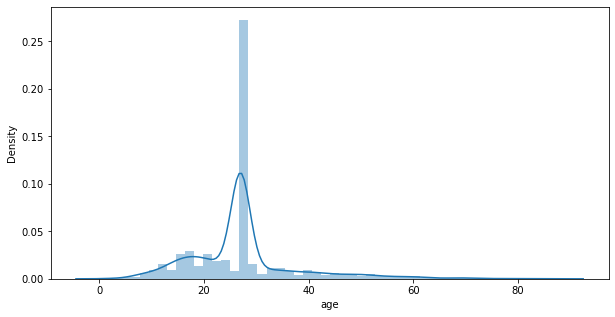

In [3]:
fig= plt.subplots(figsize = (10,5))
sns.distplot(df['age']);

- Procedemos a utilizar el método **MANUAL**

In [4]:
media = df['age'].mean()
desviacion = df['age'].std() 

In [5]:
df['age_e_manual'] = (df['age'] - media) / desviacion

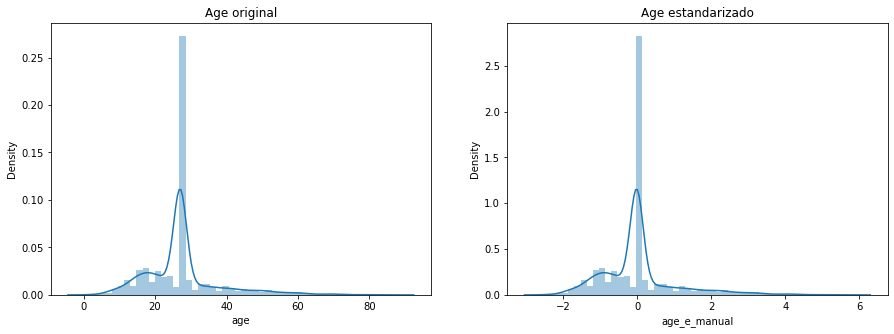

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age estandarizado')

sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df['age_e_manual'], ax = axes[1]);

Ahora observamos en la gráfica de la derecha que los valores se han estandarizado, la media es 0 y la desviación estándar 1.

- Procedemos a utilizar el método **StandarScaler**

No podemos usar este método sin un array de 2D por lo que procedemos a convertir nuestros valores de la columna para poder trabajar con ellos. Lo guardaremos para seguir trabajando con ellos en los siguiente métodos de estandarización.

In [7]:
age_2d = df['age'].values.reshape(-1, 1)

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(age_2d)

StandardScaler()

In [10]:
x_escaladas = scaler.transform(age_2d)

In [11]:
df['age_e_standar'] = pd.DataFrame(x_escaladas)

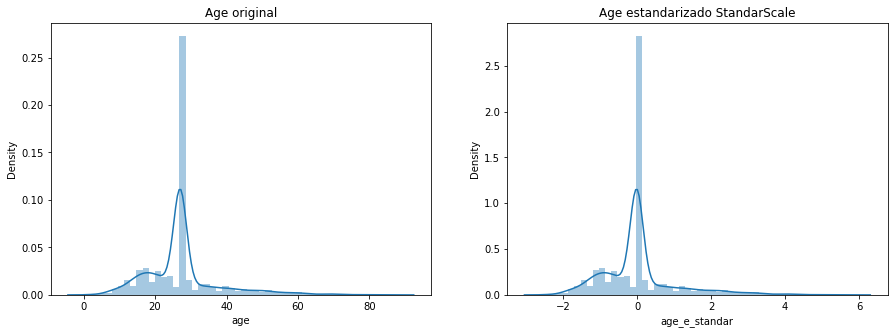

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age estandarizado StandarScale')

sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df['age_e_standar'], ax = axes[1]);

Con StandarScale la media es aproximadamente 0 y podemos verificar esto en la gráfica de la derecha.

- Procedemos a utilizar el método **Sklearn RobustScaler**

In [13]:
robust = RobustScaler()

In [14]:
robust.fit(age_2d)

RobustScaler()

In [15]:
x_robust = robust.transform(age_2d)

In [16]:
df['age_e_robust'] = pd.DataFrame(x_robust)

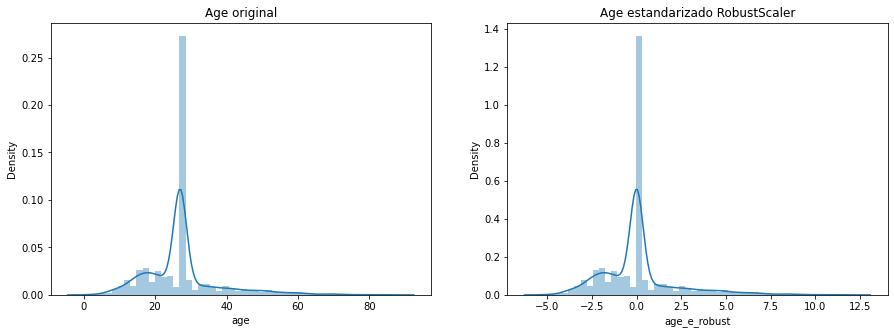

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age estandarizado RobustScaler')

sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df['age_e_robust'], ax = axes[1]);

2. ¿Véis alguna diferencia entre cada uno de los métodos?


La diferencia fundamental es que **StandarScale** estandariza con la media y la desviación estandar, y **RobustScaler** estandariza con la mediana y el rango intercuartílico.

Elegiriamos StandarScaler cuando ***SI*** tenemos outliers en nuestros datos y el RobustScaler cuando ***NO*** los hay.

3. Cread una gráfica con varios subplots donde en cada uno de ellos se vea el resultado de la estandarización y la normalización realizada en los dos ejercicios de pair programming de hoy.

In [18]:
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,...,species_.1,fecha_limpia.1,age_n_manual,age_n_log,age_n_raiz,age_n_box,age_minmax,age_e_manual,age_e_standar,age_e_robust
0,2018,Boating,usa,57,White shark,Jun,N,F,1,-100.445882,...,4,7,0.346937,4.043051,7.549834,9.116327,0.651163,2.879330,2.879561,6.0
1,2018,Unprovoked,usa,11,Unespecific,Jun,N,F,1,-100.445882,...,3,7,-0.187946,2.397895,3.316625,3.804860,0.116279,-1.559821,-1.559946,-3.2


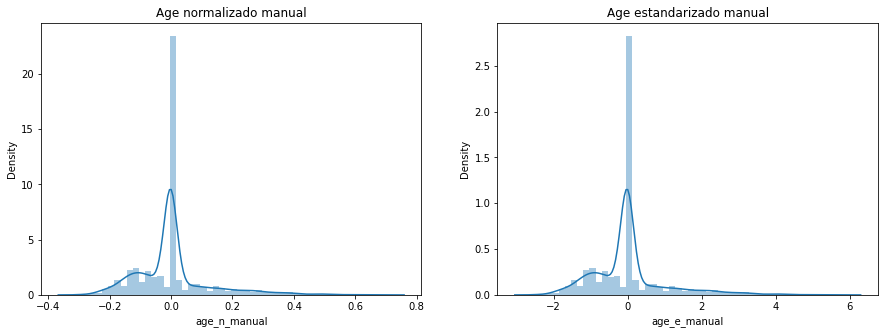

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age normalizado manual')
axes[1].set_title('Age estandarizado manual')

sns.distplot(df['age_n_manual'] ,ax = axes[0])
sns.distplot(df['age_e_manual'], ax = axes[1]);


La comparación más significativa que podemos hacer es que en la gŕafica de la columna normalizada manualmente el rango está más acotado que en la estandarizada. Una de las característica que los diferencia.

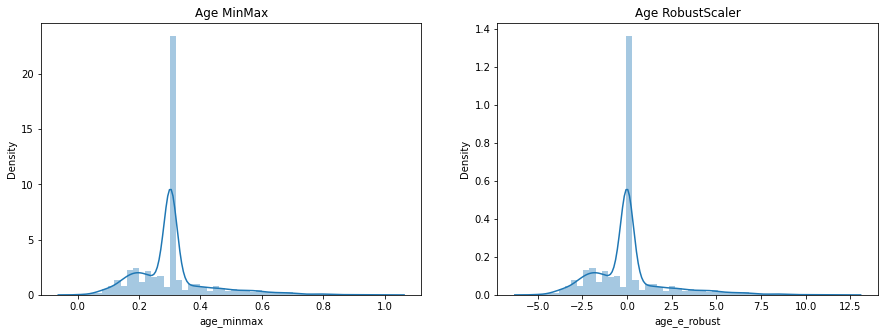

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age MinMax')
axes[1].set_title('Age RobustScaler')

sns.distplot(df['age_minmax'] ,ax = axes[0])
sns.distplot(df['age_e_robust'], ax = axes[1]);

Los dos métodos convierten a una escala similar lso valores de las variables. La diferencia como vemos en las gŕaficas es que *RobustScaler* no escala en un intervalo predeterminado como *MinMAxScaler* entre 0-1. Observamos entonces que el rango es mayor al aplicar *RobustScaler*, en este caso -5-12,5.

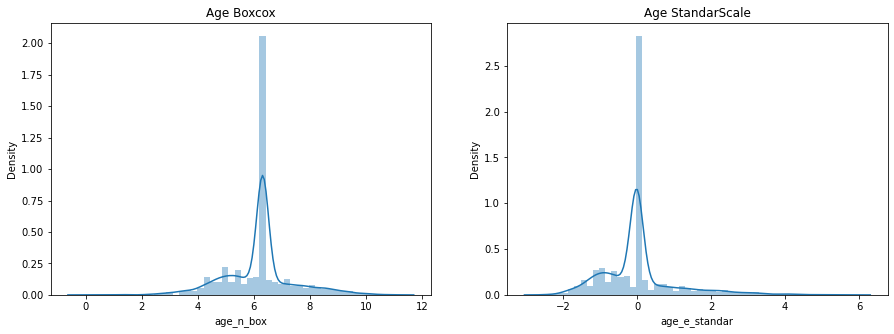

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age Boxcox')
axes[1].set_title('Age StandarScale')

sns.distplot(df['age_n_box'] ,ax = axes[0])
sns.distplot(df['age_e_standar'], ax = axes[1]);

Podemos observar en la gráfica de la derecha que con StandarScalse se ha normalizado con la media en 0. Podemos destacar también que no tienen un rango predeterminado.

GUARDAR CSV

In [23]:
df.to_csv('pairs_limpieza.csv')